<font color="dark blue">Real World Uses Cases Project: Big Data Tools for Business

---
# Part 2: Real Estate Market Data Exploration in Toulouse and its suburbs

---
<font color="grey">*Léa DIAMBUANA, Assa FISSIROU, Mehdi BALOUKA*

##Part 1 : Setting spark environment on google colabs

In [ ]:
# For installing PySpark
!pip install pyspark==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 15.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044160 sha256=4e5e181027cddcb7500e6a0e6963e25af2ad2a5b422c4f2963cbd05eeed15ca3
  Stored in directory: /root/.cache/pip/wheels/b1/bb/8b/ca24d3f756f2ed967225b0871898869db676eb5846df5adc56
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
# Mount your Google Drive to be able to access files from your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Spark-Dataframe-SQL-real-estate") \
    .getOrCreate()

# Get the SparkContext
sc = spark.sparkContext

*Setting the packages for analyses*

In [ ]:
# Spark MLib is included as part of Pyspark

!pip install pyspark==3.0.0 matplotlib

import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict
import seaborn as sns
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DateType

# Read and Parse the CSV File

#### Schema Definition for Real Estate Data

In [ ]:
# The schema must be defined using DataTypes from pyspark.sql.types
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DateType

dfSchema = StructType([
    StructField("SaleDate", StringType(), False),  # Date column - Change data type to StringType as we were facing issues
    StructField("SaleType", StringType(), False),
    StructField("Price", IntegerType(), False),
    StructField("PostCode", StringType(), False),
    StructField("City", StringType(), False),
    StructField("NbRooms", IntegerType(), False),
    StructField("NbLots", IntegerType(), False),
    StructField("ResidenceType", StringType(), False),
    StructField("LivingArea", IntegerType(), False),
    StructField("LandArea", IntegerType(), False)])

Load the CSV data into a DataFrame, considering the semicolon delimiter.

In [ ]:
 # Assa's path
real_estate_df = spark.read.option("delimiter", ";").csv('drive/MyDrive/AIBA Big data Analytics/PYSPARK-COURSE/Project/Real Estate/project_data_real_estate_toulouse_and_suburbs.csv', header=True, schema=dfSchema, dateFormat="yyyy-MM-dd")

# Convert the SaleDate to a DateType using the to_date() function
from pyspark.sql.functions import to_date
real_estate_df = real_estate_df.withColumn("SaleDate", to_date(real_estate_df["SaleDate"], "dd/MM/yyyy"))

real_estate_df.show()

+----------+--------------------+------+--------+-------------------+-------+------+-------------+----------+--------+
|  SaleDate|            SaleType| Price|PostCode|               City|NbRooms|NbLots|ResidenceType|LivingArea|LandArea|
+----------+--------------------+------+--------+-------------------+-------+------+-------------+----------+--------+
|2019-01-15|                SALE| 95000|   31270|VILLENEUVE TOLOSANE|      2|     0|        HOUSE|        45|     505|
|2019-01-21|                SALE|261700|   31270|VILLENEUVE TOLOSANE|      4|     0|        HOUSE|        87|     311|
|2019-01-03|                SALE|101000|   31270|VILLENEUVE TOLOSANE|      2|     1|    APARTMENT|        44|       0|
|2019-01-11|                SALE| 59500|   31270|VILLENEUVE TOLOSANE|      1|     1|    APARTMENT|        26|       0|
|2019-01-15|                SALE|179000|   31270|VILLENEUVE TOLOSANE|      4|     0|        HOUSE|        95|     263|
|2019-01-15|                SALE|209300|   31270

## EDA - Exploratory Data Analysis on Real Estate Data

Display the shape, schema, and statistical summary of the real estate DataFrame

In [ ]:
# Exploratory Data Analysis on Real Estate Data
print("Exploratory Data Analysis on Real Estate Data:")

# Calculate the shape of the DataFrame
print("\nDataFrame shape:")
print("Rows:", real_estate_df.count(), "Columns:", len(real_estate_df.columns))

# Print the schema of the DataFrame
print("\nDataFrame schema:")
real_estate_df.printSchema()

Exploratory Data Analysis on Real Estate Data:

DataFrame shape:
Rows: 80118 Columns: 10

DataFrame schema:
root
 |-- SaleDate: date (nullable = true)
 |-- SaleType: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- PostCode: string (nullable = true)
 |-- City: string (nullable = true)
 |-- NbRooms: integer (nullable = true)
 |-- NbLots: integer (nullable = true)
 |-- ResidenceType: string (nullable = true)
 |-- LivingArea: integer (nullable = true)
 |-- LandArea: integer (nullable = true)



In [ ]:
# Select the specific columns of interest
columns_for_EDA = ["Price", "LivingArea", "LandArea", "NbRooms", "NbLots"]

# Display statistical summary for selected columns relevant to EDA
print("\nStatistical summary for selected columns:")
real_estate_df.select(columns_for_EDA).describe().show()


Statistical summary for selected columns:
+-------+-----------------+------------------+------------------+------------------+------------------+
|summary|            Price|        LivingArea|          LandArea|           NbRooms|            NbLots|
+-------+-----------------+------------------+------------------+------------------+------------------+
|  count|            77105|             80118|             80118|             80118|             80118|
|   mean|552147.5415342714| 66.89275818168201|254.02662323073466| 3.000099852717242|1.0370453580968073|
| stddev|2435569.995421839|35.895209994602894|1369.2367598573917|1.3511218124829423|0.8291382225291016|
|    min|                0|                 1|                 0|                 1|                 0|
|    max|         33427218|               481|             60792|                41|                13|
+-------+-----------------+------------------+------------------+------------------+------------------+



### Calculate and display the evolution of price per square meter


In [ ]:
import pyspark.sql.functions as f

price_evolution = real_estate_df.groupBy('SaleDate')\
    .agg((f.sum('Price') / f.sum('LivingArea')).alias('Price_square'))\
    .orderBy('SaleDate')

# Show the first few records of the price evolution
print("First few records of the price evolution:")
price_evolution.show(7)

# Convert to Pandas DataFrame for visualization
pandas_df = price_evolution.toPandas()

First few records of the price evolution:
+----------+------------------+
|  SaleDate|      Price_square|
+----------+------------------+
|2015-01-02|2453.1052631578946|
|2015-01-03| 2089.887640449438|
|2015-01-04| 3418.803418803419|
|2015-01-05|2567.3167777104786|
|2015-01-06| 2919.534515277254|
|2015-01-07| 5187.600485240599|
|2015-01-08| 6485.476973684211|
+----------+------------------+
only showing top 7 rows



## Line Plot for Price Evolution Over Time
Visualize the trend of price per square meter over time


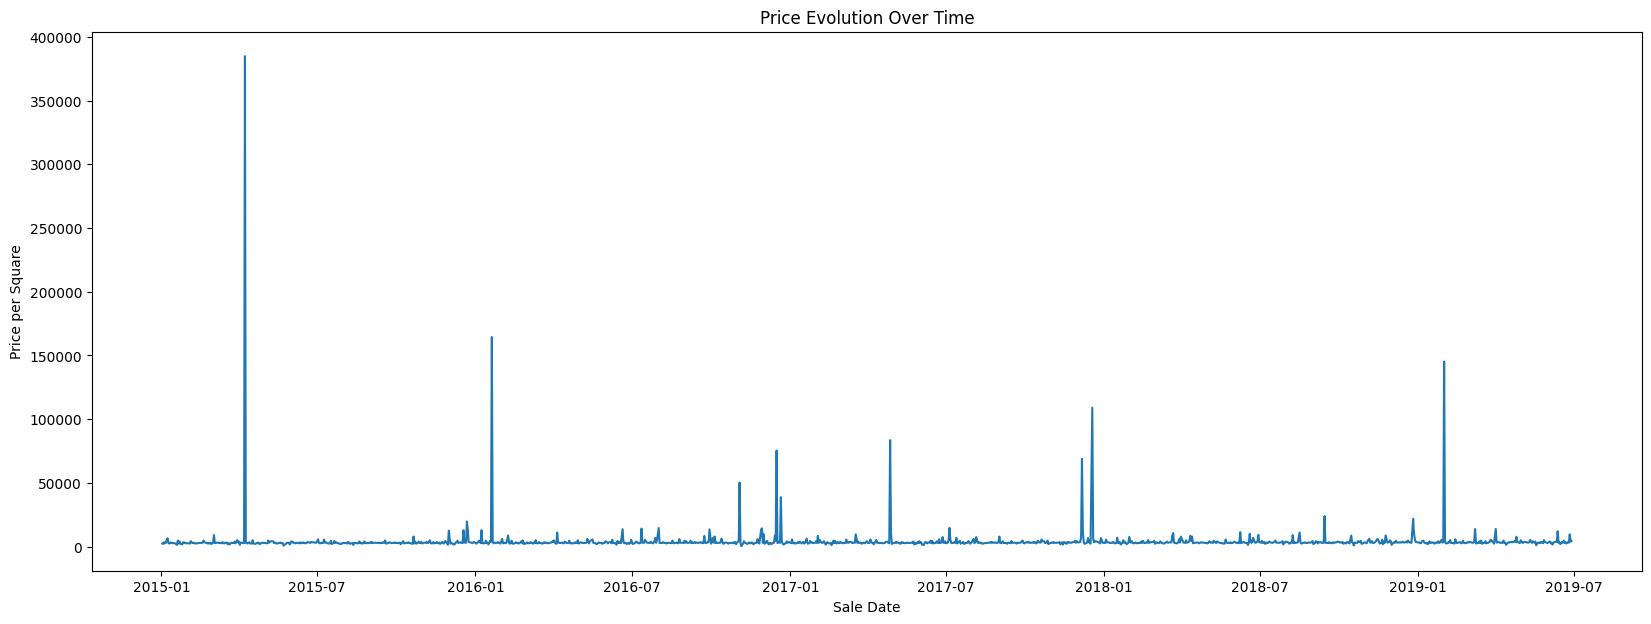

In [ ]:
# Create a line plot
plt.figure(figsize=(20, 7))
sns.lineplot(x='SaleDate', y='Price_square', data=pandas_df)

# Set a title for the plot
plt.title('Price Evolution Over Time')

# Set labels for the plot
plt.xlabel('Sale Date')
plt.ylabel('Price per Square')

# Show the plot
plt.show()

**Outliers in the price evolution**

We can observe some outliers in the price per square meter exceeding 50,000 in certain periods. These outliers are significant as they can indicate unique properties or errors in the data.

To ensure the integrity of our analysis, we will exclude outliers over the 98th quartile from our detailed analysis (2%), although these outliers could be interesting for a separate investigation.

Real estate prices can vary significantly depending on the area, and extreme values are not uncommon.

**Then, let's analyze the differences between residence types: Houses and Apartments. **

After conducting research, we've decided to employ a weighted approach to calculate the combined price per square meter,  considering the relative value of living space versus land area. This approach accounts for factors
such as location, zoning regulations, and development potential, using the formula:

**Combined Price per m² = Price of Property / (Living Area in m² + Land Area in m²). **

### Identify & Remove Outliers

In [ ]:
# Calculate the 99th percentile for the 'Price' column
quantile_99 = real_estate_df.stat.approxQuantile("Price", [0.99], 0.01)

# quantile_99 will contain one value: the 98.5th percentile of the 'Price' column
upper_bound = quantile_99[0]

# Now you can filter your DataFrame to exclude prices above this upper bound
real_estate_df = real_estate_df.filter(real_estate_df["Price"] <= upper_bound)

The **approxQuantile method** is used to find the 98th percentile for the Price column with a relativeError of 0.01, providing a balance between accuracy and computational efficiency.

The upper_bound is then used as a threshold to filter out any rows in the DataFrame where the Price exceeds this value.

This way, you ensure that our analysis focuses on the majority of the data and is not skewed by a few extreme outliers.

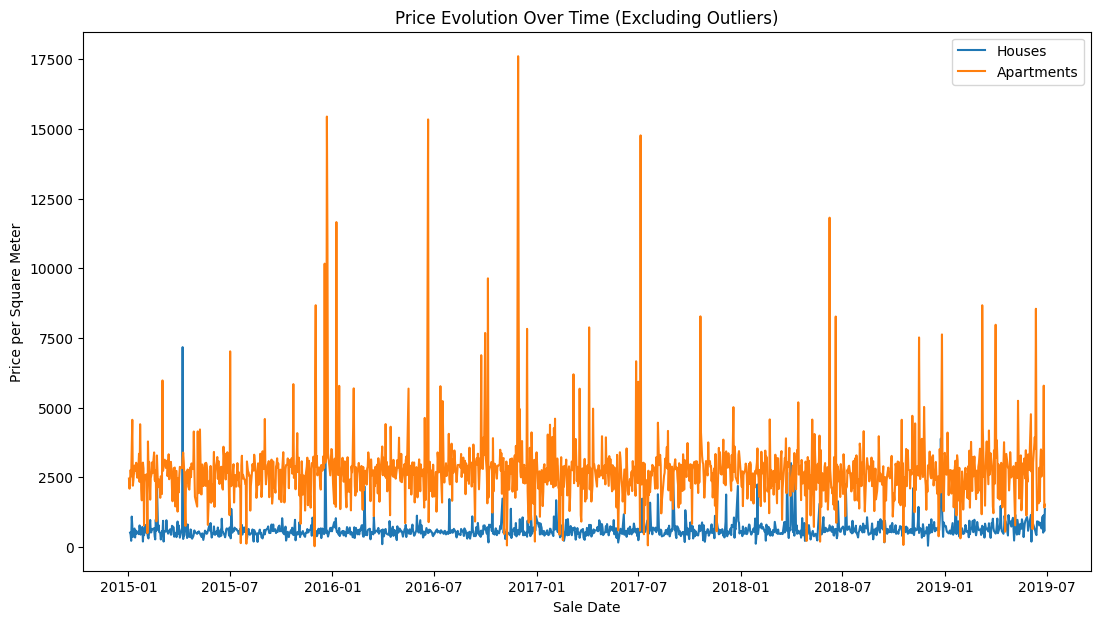

In [ ]:
# Calculate the combined price per square meter for houses
house_price_evolution = filtered_real_estate_df.filter(filtered_real_estate_df['ResidenceType'] == 'HOUSE') \
    .groupBy('SaleDate') \
    .agg((f.sum('Price') / (f.sum('LivingArea') + f.sum('LandArea'))).alias('Price_per_m2')) \
    .orderBy('SaleDate')

# Calculate the combined price per square meter for apartments
apartment_price_evolution = filtered_real_estate_df.filter(filtered_real_estate_df['ResidenceType'] == 'APARTMENT') \
    .groupBy('SaleDate') \
    .agg((f.sum('Price') / (f.sum('LivingArea') + f.sum('LandArea'))).alias('Price_per_m2')) \
    .orderBy('SaleDate')

# Create line plots for houses and apartments using Matplotlib and Seaborn
plt.figure(figsize=(13, 7))

# Plot for houses
sns.lineplot(x='SaleDate', y='Price_per_m2', data=house_price_evolution.toPandas(), label='Houses')

# Plot for apartments
sns.lineplot(x='SaleDate', y='Price_per_m2', data=apartment_price_evolution.toPandas(), label='Apartments')

plt.title('Price Evolution Over Time (Excluding Outliers)')
plt.xlabel('Sale Date')
plt.ylabel('Price per Square Meter')
plt.legend()
plt.show()

The plot illustrates the price evolution over time for houses and apartments,
 excluding outliers with a price per square meter exceeding 50k.

It shows that houses generally have higher prices per square meter compared to apartments, which can be attributed to factors such as larger living space, land ownership, privacy, location, demand and supply dynamics, among others.

Let's analyse price per city!

# Average price per city

<ipython-input-200-f5ec99c9299e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='City', y='avg_Price', data=average_price_per_city_df, palette='Blues_r')


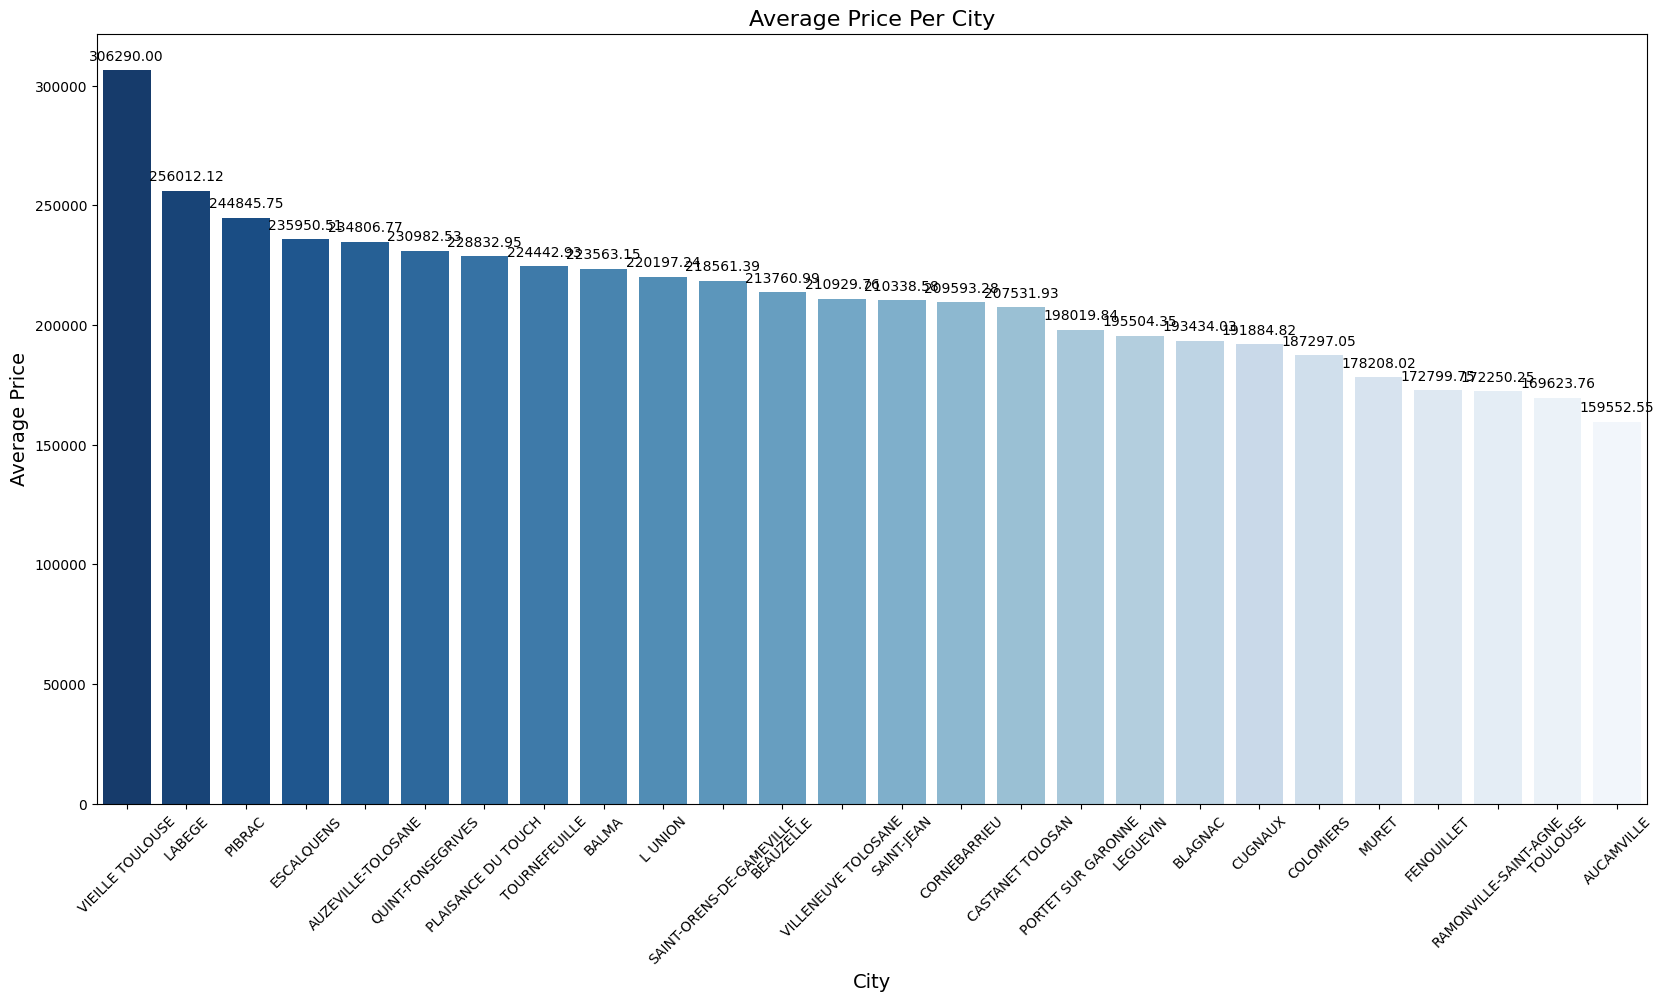

In [ ]:
# Sort the DataFrame ascendingly
average_price_per_city_df.sort_values('avg_Price', ascending=False, inplace=True)

# Compute the average price per city
average_price_per_city = real_estate_df.groupBy('City')\
                                       .agg(f.avg('Price').alias('avg_Price'))\
                                       .orderBy('avg_Price', ascending=False)

# Convert the result to Pandas DataFrame for plotting
average_price_per_city_df = average_price_per_city.toPandas()

# Plotting the overall average price per city
plt.figure(figsize=(20, 10))
barplot = sns.barplot(x='City', y='avg_Price', data=average_price_per_city_df, palette='Blues_r')

# Set labels and title
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price Per City', fontsize=16)

# Annotate bars with the average price value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

# Display the bar plot
plt.show()

To have a simpler view, we will display just the 10 cities where houses and apartments are expensive.

<ipython-input-201-994897204267>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  top_cities_barplot = sns.barplot(x='City', y='avg_Price', data=average_price_per_city_df.head(10), palette='Blues_r')


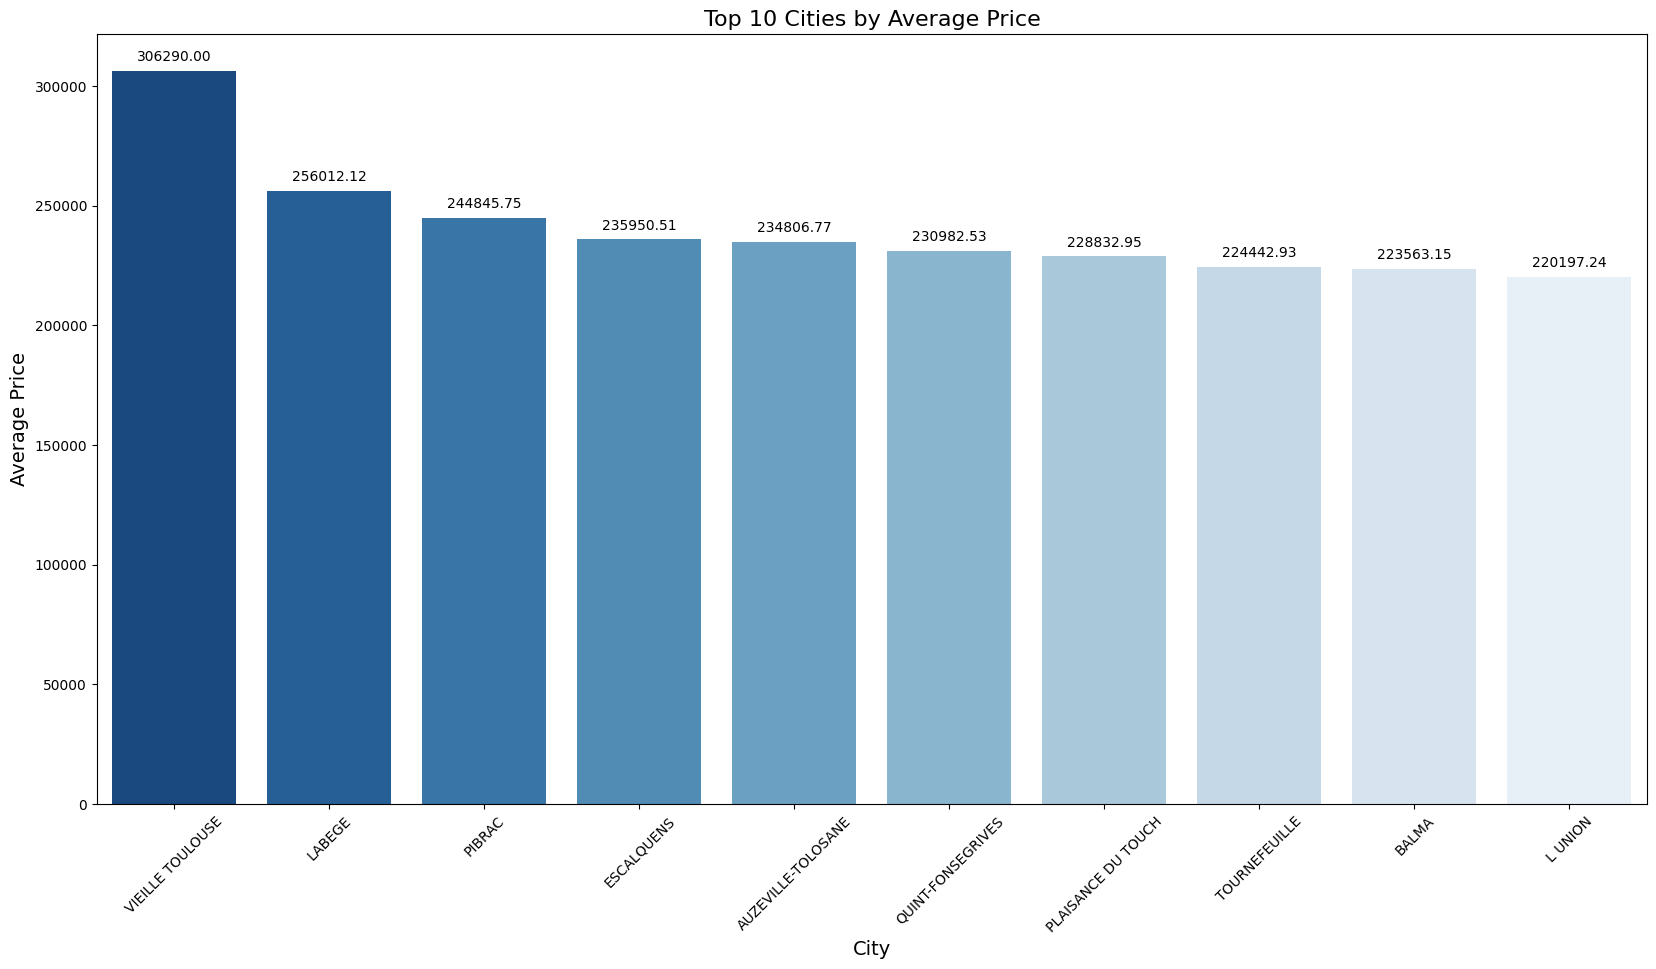

In [ ]:
# Plotting the top 10 cities by average price
plt.figure(figsize=(20, 10))
top_cities_barplot = sns.barplot(x='City', y='avg_Price', data=average_price_per_city_df.head(10), palette='Blues_r')

# Set labels and title
plt.xticks(rotation=45)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Top 10 Cities by Average Price', fontsize=16)

# Annotate bars with the average price value for top cities
for p in top_cities_barplot.patches:
    top_cities_barplot.annotate(format(p.get_height(), '.2f'),
                                (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha = 'center', va = 'center',
                                xytext = (0, 10),
                                textcoords = 'offset points')

# Display the bar plot
plt.show()

Interpretation:

From this graph we can notice the variation of the price of square meter in each part of Toulouse, For Vieille Toulouse and Labege we find the highest price per square meter.

Important note:

We have excluding 1% of highest value, we can reproduce this computation without excluding 1% of these "outliers" even if that is a minority of observations.

## House Analysis

<ipython-input-202-9da5c37f76c5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='avg_Price_per_total_square_meter', data=average_price_per_total_square_meter_house_df, palette='Blues_r')


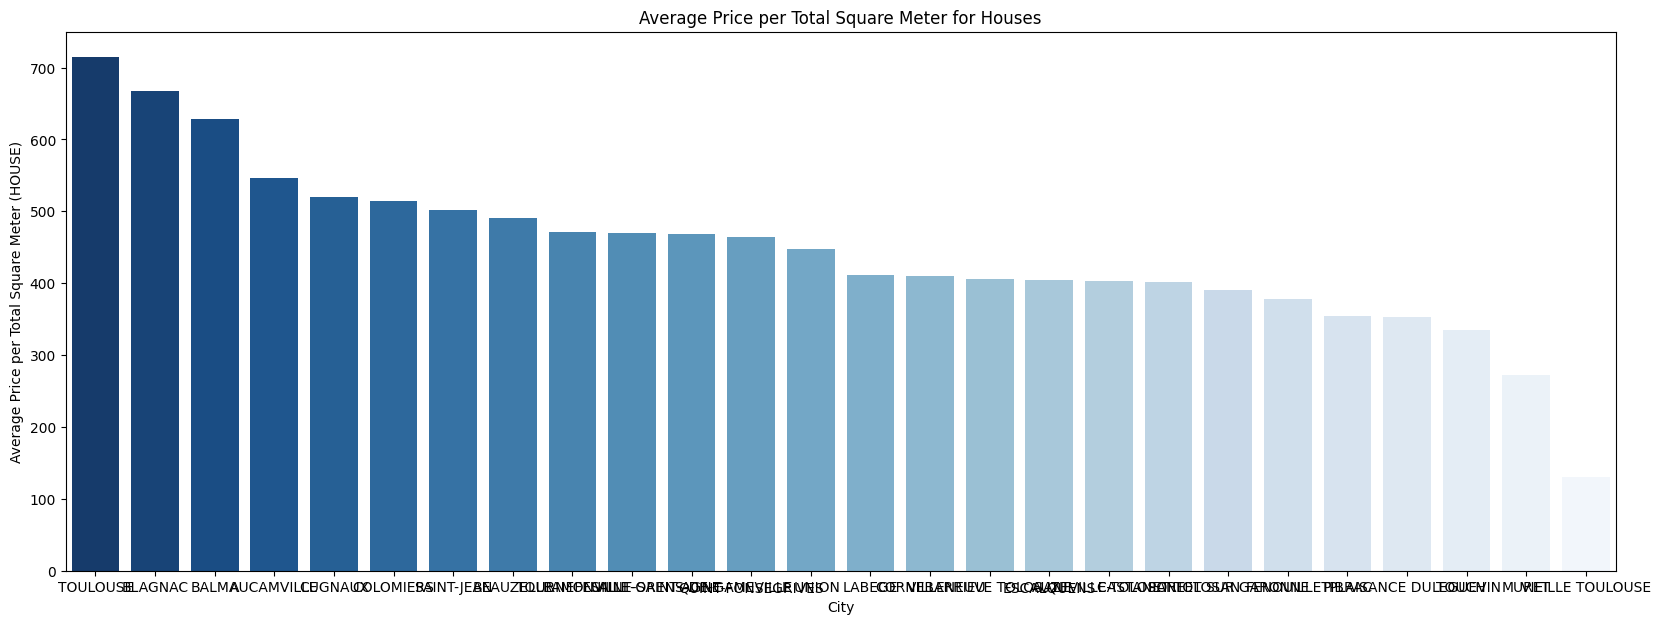

In [ ]:

# Compute the average price per total square meter for houses
average_price_per_total_square_meter_house = real_estate_df.filter(real_estate_df['ResidenceType'] == 'HOUSE') \
    .groupBy('City') \
    .agg((f.avg('Price') / (f.avg('LivingArea') + f.avg('LandArea'))).alias('avg_Price_per_total_square_meter')) \
    .orderBy('avg_Price_per_total_square_meter', ascending=False)

# Convert the result to a Pandas DataFrame for plotting
average_price_per_total_square_meter_house_df = average_price_per_total_square_meter_house.toPandas()

# Create a bar plot with a blue color palette
plt.figure(figsize=(20, 7))
sns.barplot(x='City', y='avg_Price_per_total_square_meter', data=average_price_per_total_square_meter_house_df, palette='Blues_r')

# Set labels and title
plt.xlabel('City')
plt.ylabel('Average Price per Total Square Meter (HOUSE)')
plt.title('Average Price per Total Square Meter for Houses')

# Display the bar plot
plt.show()

<ipython-input-203-007d934ab9aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='avg_Price_per_total_square_meter', data=average_price_per_total_square_meter_house_df.head(10), palette='Blues_r')


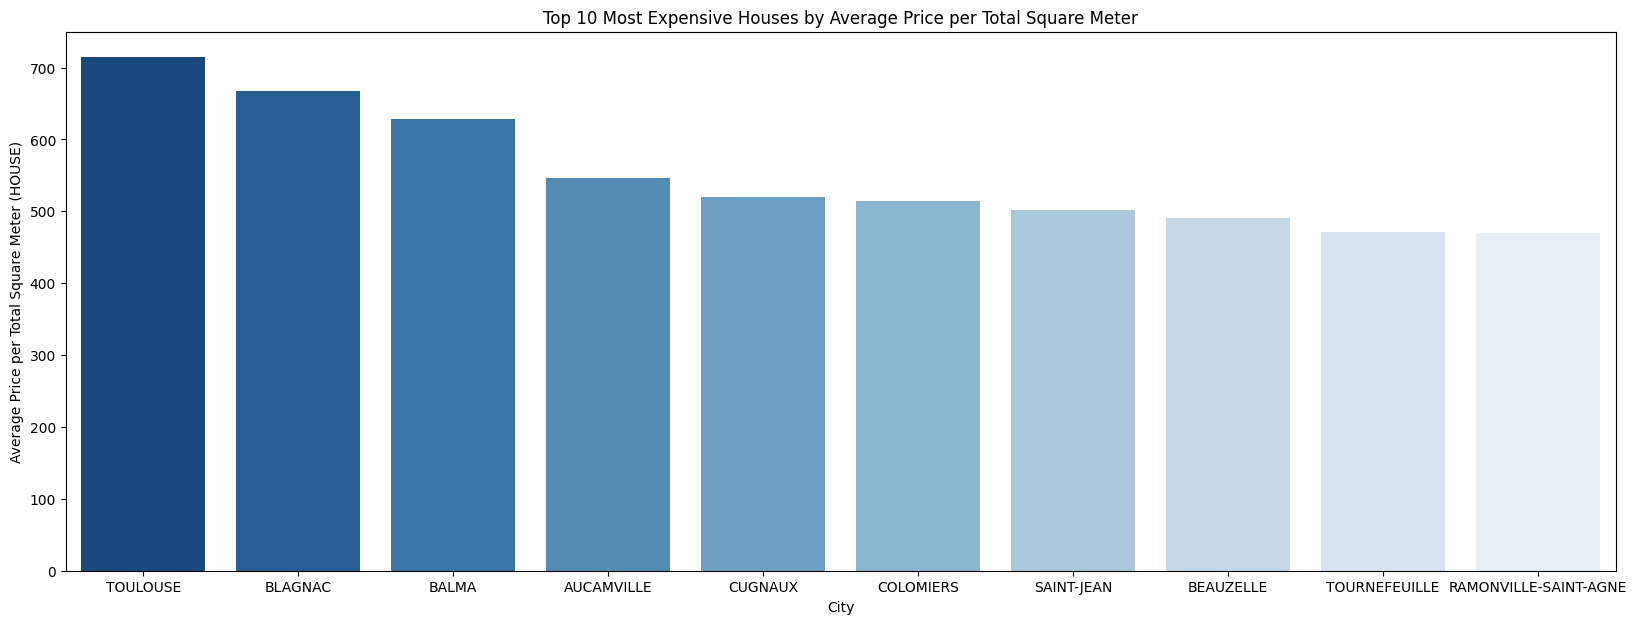

In [ ]:
# Plotting the top 10 most expensive houses
plt.figure(figsize=(20, 7))
sns.barplot(x='City', y='avg_Price_per_total_square_meter', data=average_price_per_total_square_meter_house_df.head(10), palette='Blues_r')

# Set labels and title
plt.xlabel('City')
plt.ylabel('Average Price per Total Square Meter (HOUSE)')
plt.title('Top 10 Most Expensive Houses by Average Price per Total Square Meter')

# Display the bar plot
plt.show()

We calculated the total area of each house as the sum of its living area and land area.

This aggregate measure allowed us to allocate the price of the house proportionally to its living and land components, generating two metrics: **Weighted_Living_Area_Price and Weighted_Land_Area_Price.**

These weighted prices reflect the relative value of living spaces and land in the overall price of a house. The computation was performed for each property in our dataset, and average values were aggregated by city.
This analysis was then visualized for the top 10 cities, offering insights into how different urban areas value living versus land space in residential properties.

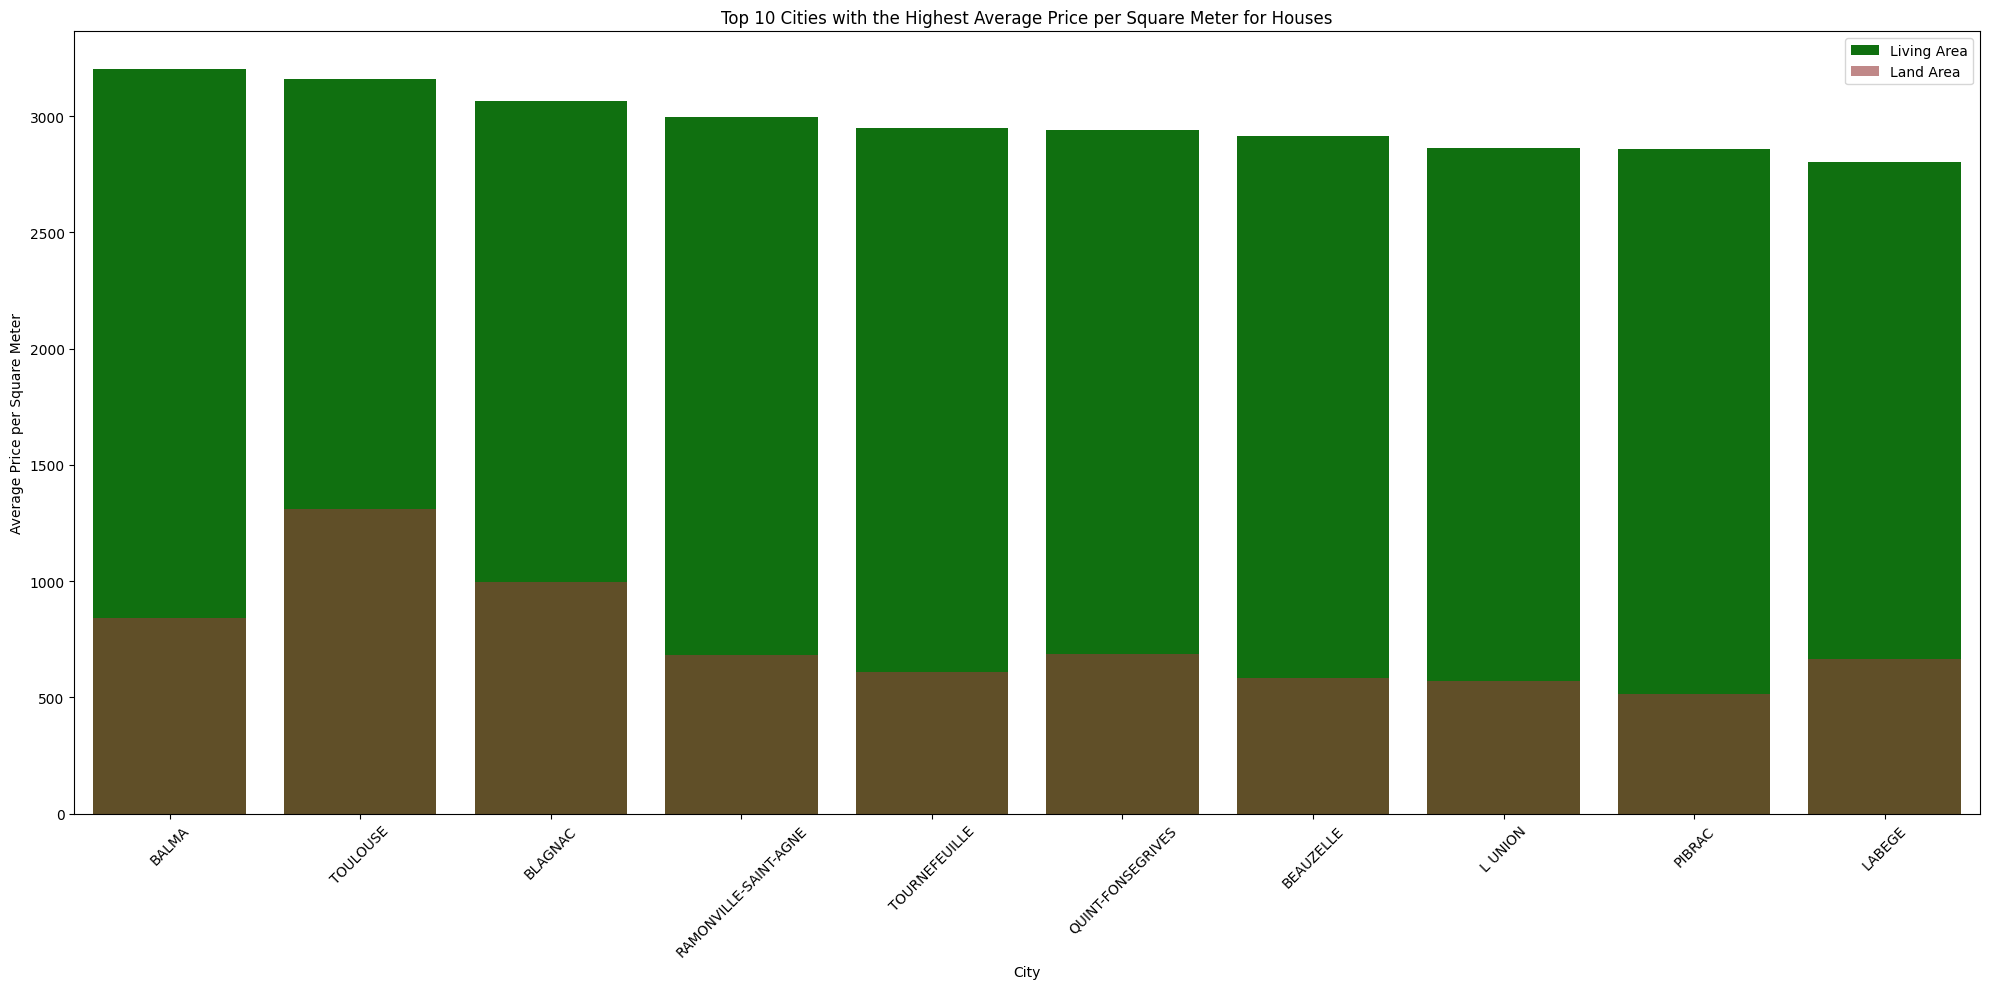

In [ ]:
# Calculate price per square meter for living area and land area
real_estate_df = real_estate_df.withColumn("Price_Per_Sq_M_Living", real_estate_df["Price"] / real_estate_df["LivingArea"])
real_estate_df = real_estate_df.withColumn("Price_Per_Sq_M_Land", real_estate_df["Price"] / real_estate_df["LandArea"])

# Aggregate these prices by city for houses, focusing on the highest average prices
average_prices_per_city_house = real_estate_df.filter(real_estate_df['ResidenceType'] == 'HOUSE')\
    .groupBy('City')\
    .agg(f.avg("Price_Per_Sq_M_Living").alias("Avg_Price_Per_Sq_M_Living"),
         f.avg("Price_Per_Sq_M_Land").alias("Avg_Price_Per_Sq_M_Land"))\
    .orderBy("Avg_Price_Per_Sq_M_Living", ascending=False)  # Ensure we're capturing the highest values

# Select the top 10 cities with the highest average price per square meter for living areas
top_10_cities_house = average_prices_per_city_house.limit(10)

# Convert to Pandas DataFrame for plotting
top_10_cities_house_pd = top_10_cities_house.toPandas()

# Visualization for the top 10 most expensive houses by average price per square meter
plt.figure(figsize=(20, 10))
sns.barplot(x="City", y="Avg_Price_Per_Sq_M_Living", data=top_10_cities_house_pd, label="Living Area", color="green")
sns.barplot(x="City", y="Avg_Price_Per_Sq_M_Land", data=top_10_cities_house_pd, label="Land Area", color="brown", alpha=0.6)

plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Average Price per Square Meter")
plt.title("Top 10 Cities with the Highest Average Price per Square Meter for Houses")
plt.legend()
plt.tight_layout()
plt.show()

Balma, Toulouse and Blagnac are the top 3 of most valuable places. The price is very close to others.

But it is interesting to note that at Toulouse, land area is very appreciated compare to other price for living area at Balma or Blagnac - it is the most valuable!

## Appartment Analysis

Let's analysing the price per living area for apartments.

<ipython-input-205-4579d7d525ac>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='avg_Price_per_area', data=average_price_per_area_apartment_df, palette='Blues_r')


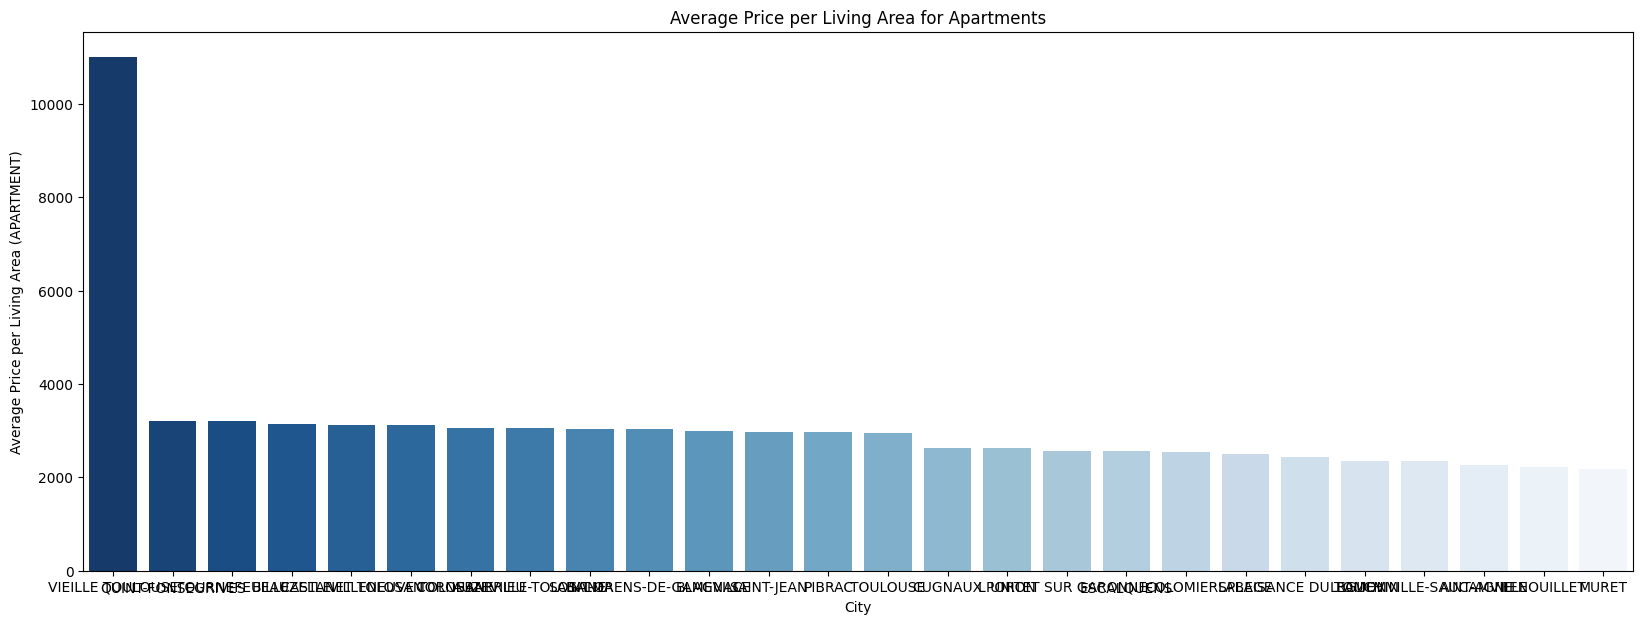

In [ ]:
# Compute the average price per living area for apartments
average_price_per_area_apartment = real_estate_df.filter(real_estate_df['ResidenceType'] == 'APARTMENT') \
    .groupBy('City') \
    .agg((f.avg('Price') / f.avg('LivingArea')).alias('avg_Price_per_area')) \
    .orderBy('avg_Price_per_area', ascending=False)

# Convert the result to a Pandas DataFrame for plotting
average_price_per_area_apartment_df = average_price_per_area_apartment.toPandas()

# Create a bar plot with a blue color palette
plt.figure(figsize=(20, 7))
sns.barplot(x='City', y='avg_Price_per_area', data=average_price_per_area_apartment_df, palette='Blues_r')

# Set labels and title
plt.xlabel('City')
plt.ylabel('Average Price per Living Area (APARTMENT)')
plt.title('Average Price per Living Area for Apartments')

# Display the bar plot
plt.show()


Let's only keep top 10 cities even if Vieille Toulouse is outperforming others.

<ipython-input-206-706cdd6993b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='avg_Price_per_area', data=average_price_per_area_apartment_df.head(10), palette='Blues_r')


Text(0.5, 1.0, 'Top 10 Most Expensive Apartments by Average Price per Living Area')

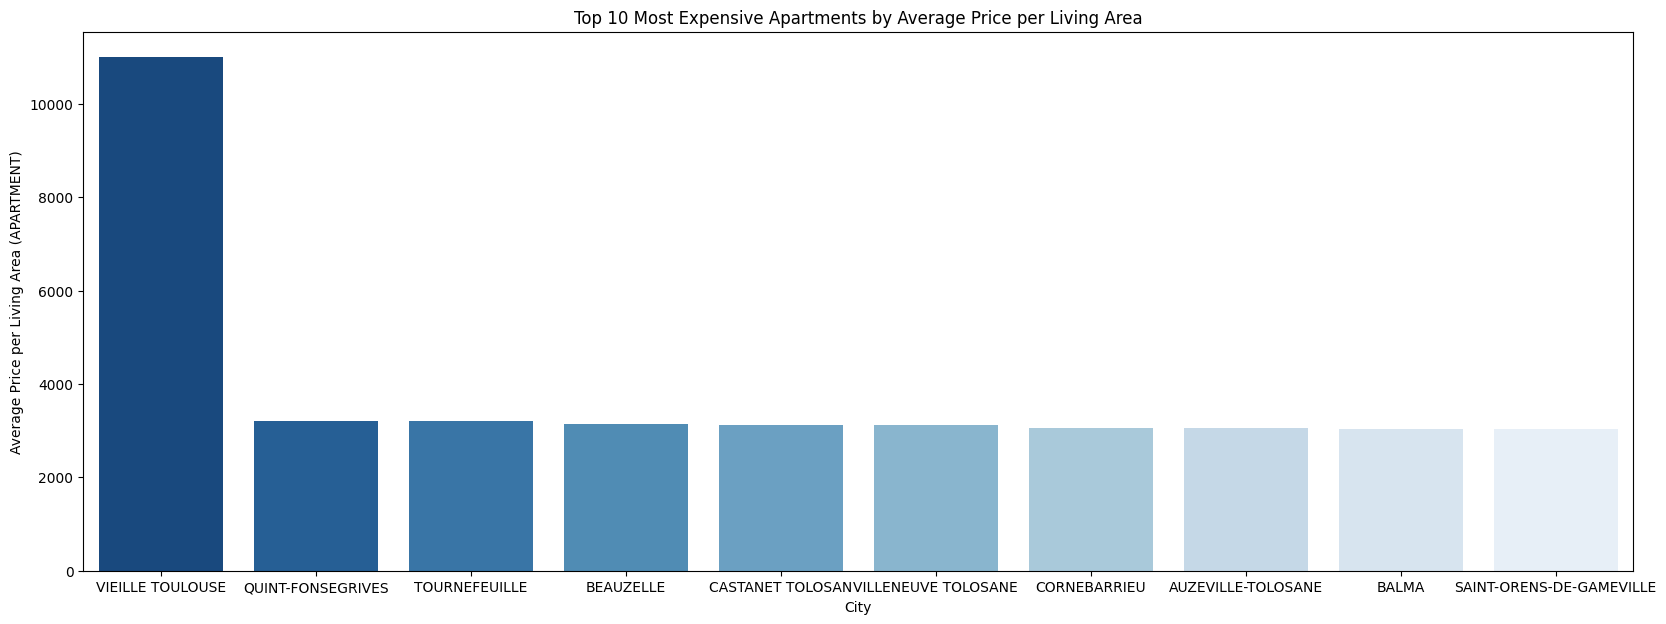

In [ ]:
# Plotting the top 10 most expensive apartments
plt.figure(figsize=(20, 7))
sns.barplot(x='City', y='avg_Price_per_area', data=average_price_per_area_apartment_df.head(10), palette='Blues_r')

# Set labels and title
plt.xlabel('City')
plt.ylabel('Average Price per Living Area (APARTMENT)')
plt.title('Top 10 Most Expensive Apartments by Average Price per Living Area')


Let's analyse the impact of a extra land area for an apartment on their price:

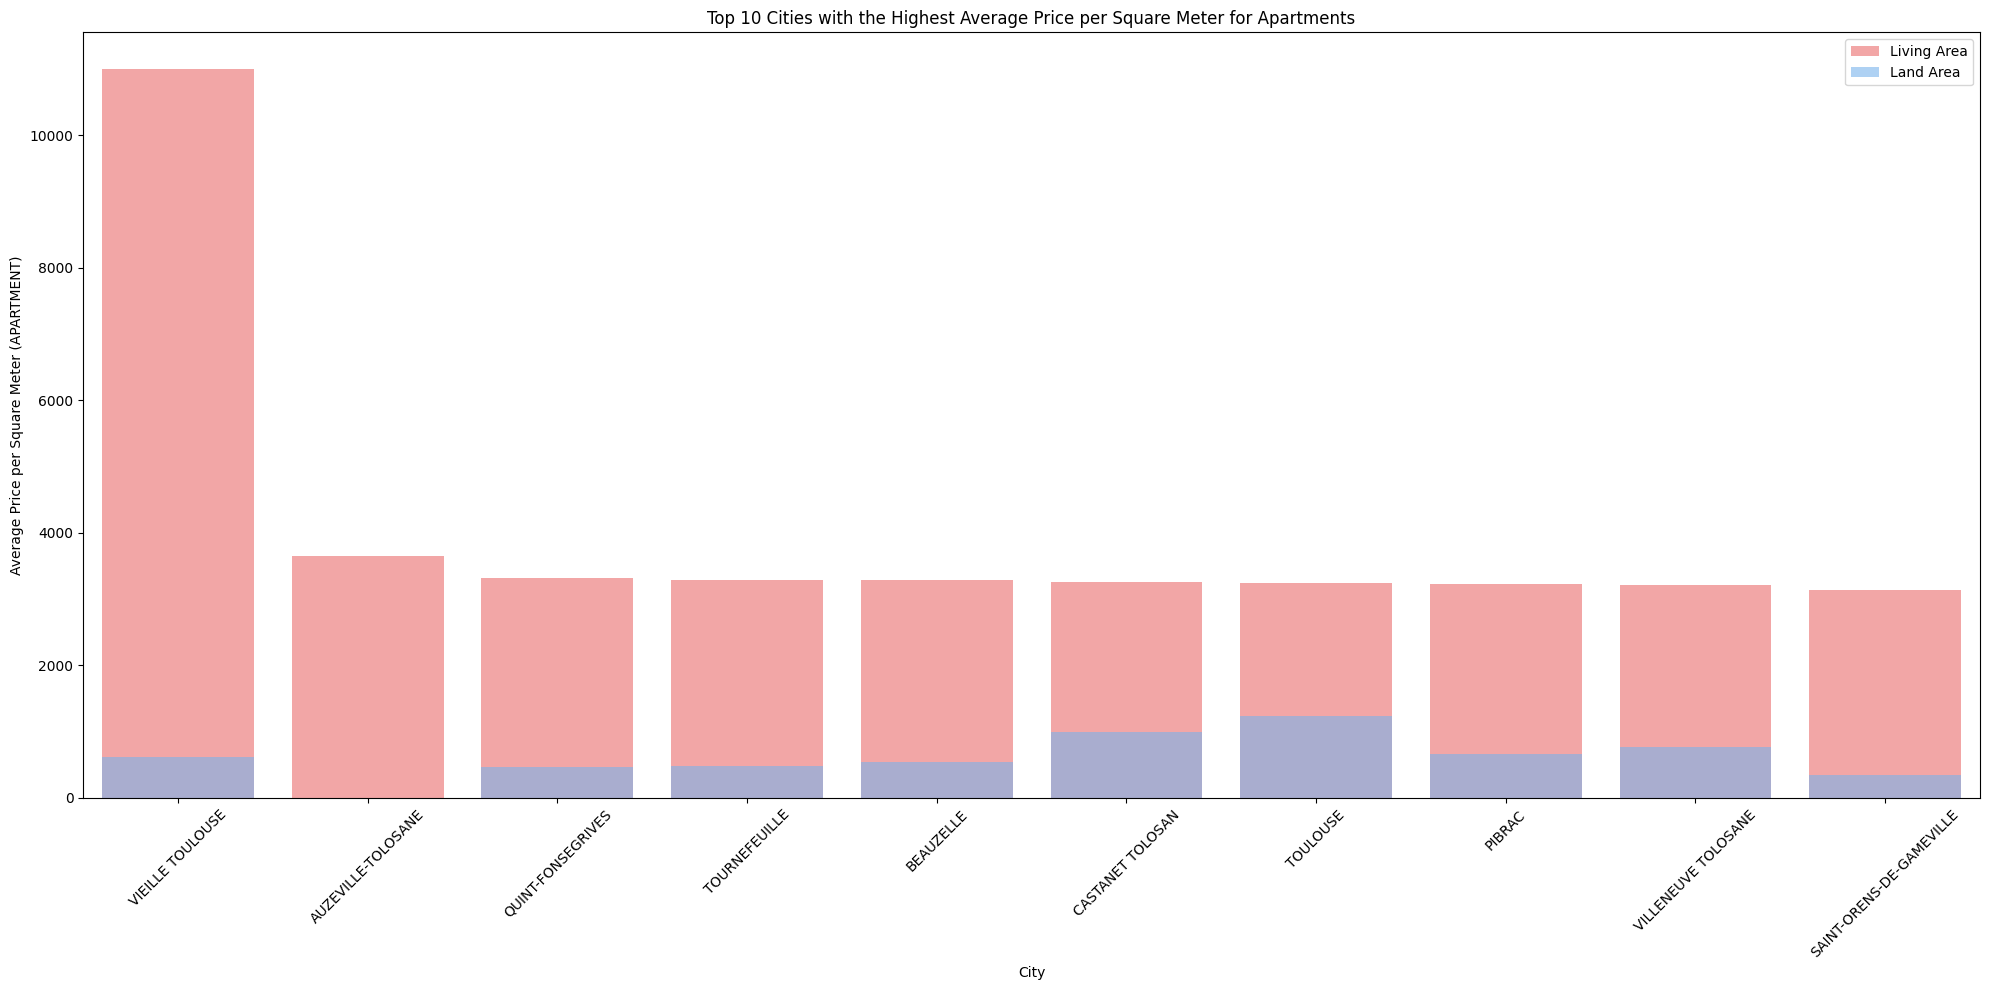

In [ ]:
# Aggregate these prices by city for apartments, focusing on the highest average prices
average_prices_per_city_apartment = real_estate_df.filter(real_estate_df['ResidenceType'] == 'APARTMENT')\
    .groupBy('City')\
    .agg(f.avg("Price_Per_Sq_M_Living").alias("Avg_Price_Per_Sq_M_Living"),
         f.avg("Price_Per_Sq_M_Land").alias("Avg_Price_Per_Sq_M_Land"))\
    .orderBy("Avg_Price_Per_Sq_M_Living", ascending=False)  # Capturing the highest values for apartments

# Select the top 10 cities with the highest average price per square meter for apartments
top_10_cities_apartment = average_prices_per_city_apartment.limit(10)

# Convert to Pandas DataFrame for plotting
top_10_cities_apartment_pd = top_10_cities_apartment.toPandas()

# Visualization for the top 10 most expensive apartments by average price per square meter
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
# Using more comfortable colors for living area and land area
sns.barplot(x="City", y="Avg_Price_Per_Sq_M_Living", data=top_10_cities_apartment_pd, label="Living Area", color="#ff9999")
sns.barplot(x="City", y="Avg_Price_Per_Sq_M_Land", data=top_10_cities_apartment_pd, label="Land Area", color="#66b3ff", alpha=0.6)

plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Average Price per Square Meter (APARTMENT)")
plt.title("Top 10 Cities with the Highest Average Price per Square Meter for Apartments")
plt.legend()
plt.tight_layout()
plt.show()

Again, Vieille Toulouse is valuable compare to others for Apartment & Houses.

# Apartment vs Houses


## Number of Room
To compare houses and apartments in terms of the average number of rooms, we will aggregate the data to calculate the average number of rooms by residence type. Then, you can visualize this comparison using a bar plot.

In [ ]:
# Aggregate data to calculate the average number of rooms by residence type
number_of_rooms_by_type = real_estate_df.groupBy('ResidenceType')\
                                        .agg(f.avg('NbRooms').alias('avg_NbRooms'))

# For comparison outside Toulouse
number_of_rooms_by_type_excluding_toulouse = real_estate_df.filter(real_estate_df['City'] != 'TOULOUSE')\
                                                           .groupBy('ResidenceType')\
                                                           .agg(f.avg('NbRooms').alias('avg_NbRooms'))

**Visualization:**

<ipython-input-212-faca3952a4be>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ResidenceType', y='avg_NbRooms', data=number_of_rooms_by_type_pd, palette=['#3498db', '#e74c3c'])


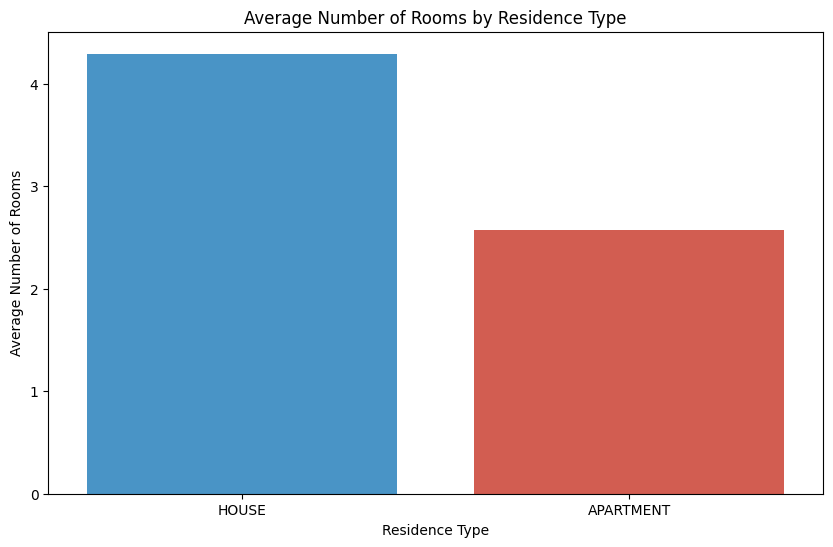

In [ ]:
# Convert Spark DataFrame to Pandas DataFrame for visualization
number_of_rooms_by_type_pd = number_of_rooms_by_type.toPandas()
number_of_rooms_by_type_excluding_toulouse_pd = number_of_rooms_by_type_excluding_toulouse.toPandas()

# Visualization for overall comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='ResidenceType', y='avg_NbRooms', data=number_of_rooms_by_type_pd, palette=['#3498db', '#e74c3c'])
plt.title('Average Number of Rooms by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Average Number of Rooms')
plt.show()

**Comparaison per city:**

In [ ]:
from pyspark.sql.functions import col, round

# Adjusting the aggregation to round the average number of rooms to 2 decimal places
avg_rooms_per_city = real_estate_df.groupBy('City', 'ResidenceType')\
                                   .agg(round(f.avg('NbRooms'), 2).alias('AvgNbRooms'))\
                                   .groupBy('City')\
                                   .pivot('ResidenceType')\
                                   .agg(f.first('AvgNbRooms'))

# Showing the DataFrame (in Spark)
avg_rooms_per_city.show()

+--------------------+---------+-----+
|                City|APARTMENT|HOUSE|
+--------------------+---------+-----+
|             BLAGNAC|     2.67| 4.18|
|          FENOUILLET|     2.63| 4.17|
|            LEGUEVIN|     2.62| 4.46|
|  PORTET SUR GARONNE|     2.76| 4.19|
| VILLENEUVE TOLOSANE|     2.69| 4.38|
|       TOURNEFEUILLE|     2.55| 4.54|
|           BEAUZELLE|     2.79| 4.36|
|              PIBRAC|     2.52| 4.55|
|RAMONVILLE-SAINT-...|     2.85| 4.59|
|        CORNEBARRIEU|     2.63| 4.03|
|               MURET|     2.63| 4.25|
|  PLAISANCE DU TOUCH|     2.57| 4.43|
|               BALMA|     2.93| 4.64|
|    VIEILLE TOULOUSE|      2.0| 4.68|
|          ESCALQUENS|     2.68| 4.55|
|             CUGNAUX|     2.74| 4.18|
|    CASTANET TOLOSAN|     2.67| 4.56|
|             L UNION|     2.64| 4.56|
|          SAINT-JEAN|     2.58| 4.62|
|   QUINT-FONSEGRIVES|     2.69| 4.38|
+--------------------+---------+-----+
only showing top 20 rows



In [ ]:
# Converting to a Pandas DataFrame for better visualization or further analysis:
avg_rooms_per_city_pd = avg_rooms_per_city.toPandas()
print(avg_rooms_per_city_pd.round(2))

                        City  APARTMENT  HOUSE
0                    BLAGNAC       2.67   4.18
1                 FENOUILLET       2.63   4.17
2                   LEGUEVIN       2.62   4.46
3         PORTET SUR GARONNE       2.76   4.19
4        VILLENEUVE TOLOSANE       2.69   4.38
5              TOURNEFEUILLE       2.55   4.54
6                  BEAUZELLE       2.79   4.36
7                     PIBRAC       2.52   4.55
8      RAMONVILLE-SAINT-AGNE       2.85   4.59
9               CORNEBARRIEU       2.63   4.03
10                     MURET       2.63   4.25
11        PLAISANCE DU TOUCH       2.57   4.43
12                     BALMA       2.93   4.64
13          VIEILLE TOULOUSE       2.00   4.68
14                ESCALQUENS       2.68   4.55
15                   CUGNAUX       2.74   4.18
16          CASTANET TOLOSAN       2.67   4.56
17                   L UNION       2.64   4.56
18                SAINT-JEAN       2.58   4.62
19         QUINT-FONSEGRIVES       2.69   4.38
20           

# Variation of prices for Houses vs Apartments

To analyze the variation of prices for houses versus apartments depending on the area for the previous year, we will follow a series of steps involving filtering your data, grouping by residence type and area, and then calculating statistical measures or trends that reflect performance.

**Calculate Average Price by Year and Residence Type**

In [ ]:
from pyspark.sql.functions import to_date, year, avg

# Extract the year from SaleDate for yearly analysis
real_estate_df = real_estate_df.withColumn("Year", year("SaleDate"))

price_by_year_df = real_estate_df.groupBy("Year", "ResidenceType")\
                                 .agg(avg("Price").alias("AvgPrice"))\
                                 .orderBy("Year", "ResidenceType")

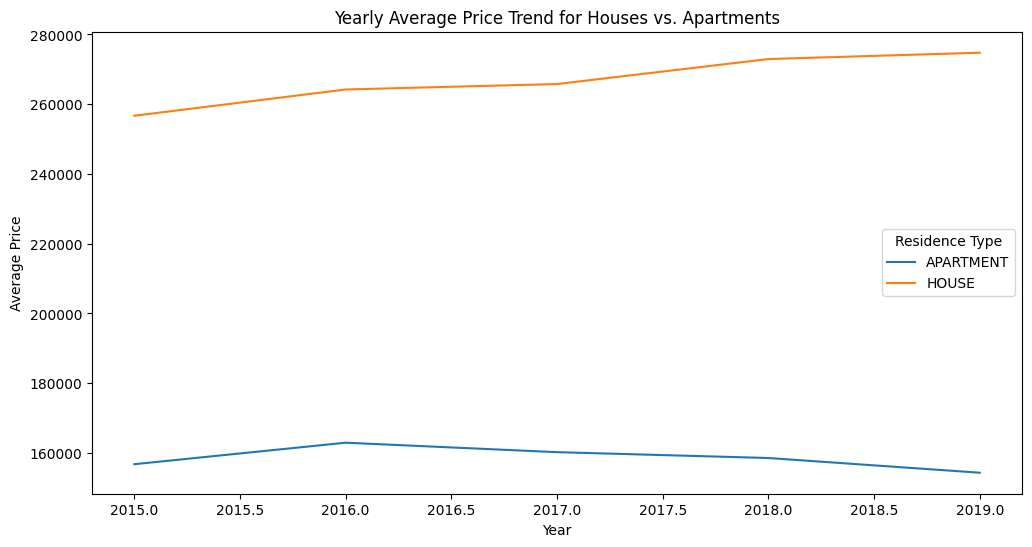

In [ ]:
price_by_year_pd = price_by_year_df.toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=price_by_year_pd, x="Year", y="AvgPrice", hue="ResidenceType")
plt.title('Yearly Average Price Trend for Houses vs. Apartments')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Residence Type')
plt.show()

Due to the difference between price of House vs Apartment, we've decided to compute the year over year percentage change in average price.

### Year-over-Year Change

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import lag, col

# Assuming price_by_year_df is already defined as shown in previous examples

# Define a window partitioned by ResidenceType, ordered by Year
windowSpec = Window.partitionBy("ResidenceType").orderBy("Year")

# Add a column with the previous year's average price
price_by_year_df = price_by_year_df.withColumn("PrevYearAvgPrice", lag("AvgPrice").over(windowSpec))

# Calculate the year-over-year percentage change
price_by_year_df = price_by_year_df.withColumn("PctChange",
                                                (col("AvgPrice") - col("PrevYearAvgPrice")) / col("PrevYearAvgPrice") * 100)

# Filter out the first row for each residence type since the percentage change can't be calculated for the first year in the dataset
price_by_year_df = price_by_year_df.filter(col("PctChange").isNotNull())


### Visualization of Percentage Change

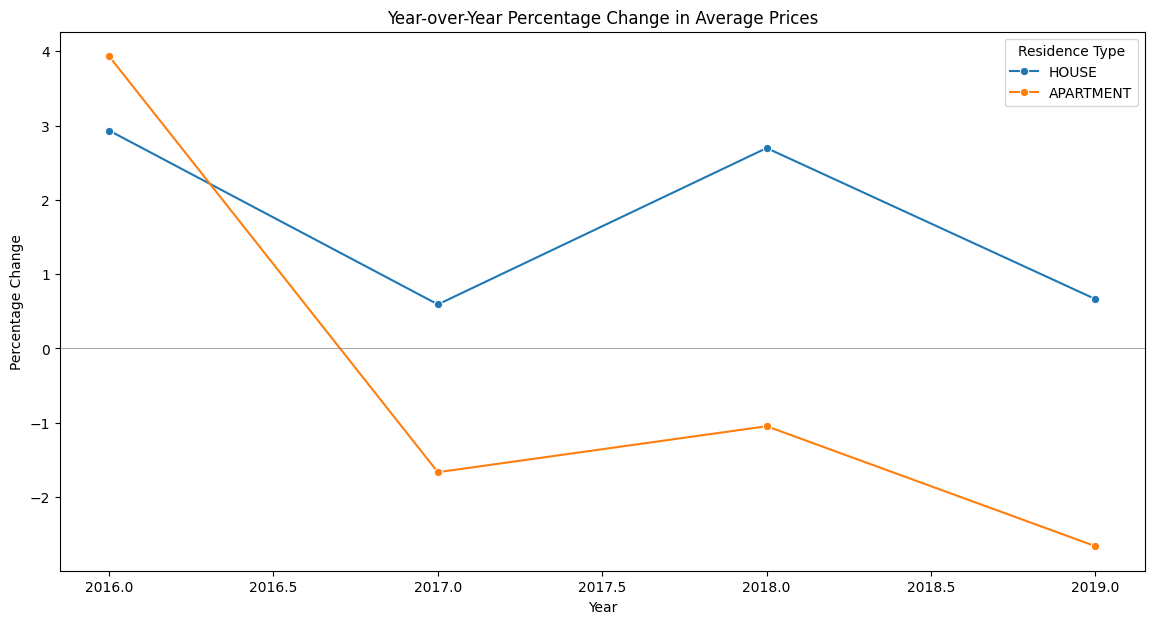

In [ ]:
# Convert to Pandas DataFrame for visualization
price_pct_change_pd = price_by_year_df.toPandas()

# Visualization
plt.figure(figsize=(14, 7))
sns.lineplot(data=price_pct_change_pd, x="Year", y="PctChange", hue="ResidenceType", marker="o")
plt.title('Year-over-Year Percentage Change in Average Prices')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.axhline(0, color='grey', lw=0.5)
plt.legend(title='Residence Type')
plt.show()

**Highlighting the Observation**

Based on the data analysis, we've observed that while apartment prices can decrease, house prices tend to maintain a trend of increasing by more than 1% annually, suggesting that house values tend to keep pace with or exceed inflation, thereby preserving or increasing their value over time.

**Specific Trends in Selected Years**

In 2016, apartment prices were significantly higher than those of houses. However, from 2017 to 2019, apartment prices fluctuated between 0% and -2% year-over-year change, indicating a period of stagnation or slight decline. In contrast, house prices during the same period (specifically in 2016 and 2017) showed a more robust growth, staying between 3% and 1%, which underscores the resilience of house values during those years.

# Forecast
When analyzing the real estate market dynamics, it's crucial to differentiate between houses and apartments due to their distinct market behaviors. As observed, houses tend to exhibit a steady increase in value, often aligning with or surpassing inflation rates, thereby representing a stable investment.

Apartments, while potentially offering higher initial returns, can show greater price volatility. To gain deeper insights and guide investment decisions, we forecast future price trends for both houses and apartments across different cities.

**Forecasting Approach:**


*   Data Preparation
*   Model Selection: ML Approach thanks to Facebook Prophet library.
*   Forecasting Execution
*   Visualization & Analysis





## Data Preparation

In [ ]:
from pyspark.sql.functions import to_date, year, avg

# Assuming real_estate_df is your Spark DataFrame with real estate data
real_estate_df = real_estate_df.withColumn("SaleDate", to_date("SaleDate", "yyyy-MM-dd"))
real_estate_df = real_estate_df.withColumn("Year", year("SaleDate"))

# Aggregate average price by Year, City, and ResidenceType
price_by_year_city_df = real_estate_df.groupBy("Year", "City", "ResidenceType")\
                                      .agg(avg("Price").alias("AvgPrice"))\
                                      .orderBy("Year", "City", "ResidenceType")

## Model Selection

For this example, we choose Facebook Prophet due to its robustness and simplicity for time series forecasting.

In [ ]:
from prophet import Prophet

## Forecasting Execution

In [ ]:
# Placeholder for looping through each city and residence type
forecast_results = []

for city in price_by_year_city_df.select("City").distinct().collect():
    for residence_type in ["HOUSE", "APARTMENT"]:
        # Filter data for the current city and residence type
        city_type_df = price_by_year_city_df.filter((price_by_year_city_df.City == city.City) &
                                                    (price_by_year_city_df.ResidenceType == residence_type))

        # Convert to Pandas DataFrame
        city_type_pd = city_type_df.toPandas()

        # Rename columns for Prophet
        city_type_pd.rename(columns={'Year': 'ds', 'AvgPrice': 'y'}, inplace=True)
        city_type_pd['ds'] = pd.to_datetime(city_type_pd['ds'].astype(str) + '-01-01')


### Forecasting House Price

In [ ]:
# Assuming the loop setup as provided
for city in price_by_year_city_df.select("City").distinct().collect():
    for residence_type in ["HOUSE"]:
        # Filtering and preparation code remains the same...

        # Instantiate and fit the model
        model = Prophet()
        model.fit(city_type_pd[['ds', 'y']])

        # Make a future DataFrame for 5 years and predict
        future = model.make_future_dataframe(periods=5, freq='Y')
        forecast = model.predict(future)

        # Extract relevant forecast information (e.g., yearly trend) and append to results
        forecast_results.append({'City': city.City, 'ResidenceType': residence_type, 'Forecast': forecast[['ds', 'yhat']].tail(5)})

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyo7zigde/jxuwtksq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyo7zigde/tmnvevce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64548', 'data', 'file=/tmp/tmpyo7zigde/jxuwtksq.json', 'init=/tmp/tmpyo7zigde/tmnvevce.json', 'output', 'file=/tmp/tmpyo7zigde/prophet_modelrtsn7p7f/prophet_model-20240211230922.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:09:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

### Forecasting Apartment Price

In [ ]:
# Assuming the loop setup as provided
for city in price_by_year_city_df.select("City").distinct().collect():
    for residence_type in ["APARTMENT"]:
        # Filtering and preparation code remains the same...

        # Instantiate and fit the model
        model = Prophet()
        model.fit(city_type_pd[['ds', 'y']])

        # Make a future DataFrame for 5 years and predict
        future = model.make_future_dataframe(periods=5, freq='Y')
        forecast = model.predict(future)

        # Extract relevant forecast information (e.g., yearly trend) and append to results
        forecast_results.append({'City': city.City, 'ResidenceType': residence_type, 'Forecast': forecast[['ds', 'yhat']].tail(5)})

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyo7zigde/l2amebk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyo7zigde/fbdln7nz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2376', 'data', 'file=/tmp/tmpyo7zigde/l2amebk0.json', 'init=/tmp/tmpyo7zigde/fbdln7nz.json', 'output', 'file=/tmp/tmpyo7zigde/prophet_model7lo6_snv/prophet_model-20240211230937.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:09:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:09:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

## Collecting and Visualizing Results
After collecting the forecast results in forecast_results, we will convert this list to a DataFrame for easier manipulation and visualization.

Then, we are going to proceed to visualize the top 3 cities with the highest forecasted price increase.

### Visualization of Top 3 Cities with the Highest Forecasted Price Increase

**Adjusting Data Transformation and Forecast Extraction**

In [ ]:
# Placeholder for looping through each city and residence type
forecast_results = []

for city_row in price_by_year_city_df.select("City").distinct().collect():
    city = city_row.City
    for residence_type in ["HOUSE", "APARTMENT"]:
        # Filter data for the current city and residence type
        city_type_df = price_by_year_city_df.filter((price_by_year_city_df.City == city) &
                                                    (price_by_year_city_df.ResidenceType == residence_type))

        # Convert to Pandas DataFrame
        city_type_pd = city_type_df.toPandas()

        # Rename columns for Prophet
        city_type_pd.rename(columns={'Year': 'ds', 'AvgPrice': 'y'}, inplace=True)
        city_type_pd['ds'] = pd.to_datetime(city_type_pd['ds'].astype(str) + '-01-01')

        # Check if there are enough data points for fitting the model
        if len(city_type_pd) >= 2:
            # Instantiate and fit the model
            model = Prophet()
            model.fit(city_type_pd[['ds', 'y']])

            # Make a future DataFrame for 5 years and predict
            future = model.make_future_dataframe(periods=5, freq='Y')
            forecast = model.predict(future)

            # Extract relevant forecast information (e.g., yearly trend) and append to results
            forecast_results.append({'City': city, 'ResidenceType': residence_type, 'Forecast': forecast[['ds', 'yhat']].tail(5)})


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyo7zigde/g4_i0xu0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyo7zigde/g4rzufgo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90800', 'data', 'file=/tmp/tmpyo7zigde/g4_i0xu0.json', 'init=/tmp/tmpyo7zigde/g4rzufgo.json', 'output', 'file=/tmp/tmpyo7zigde/prophet_modelg_e1q964/prophet_model-20240211232825.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:28:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:28:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

**Visualization for Apartments Over the Next Year**


In [ ]:
# Filter forecast_df for apartments
apartment_forecast_df = forecast_df[forecast_df['ResidenceType'] == 'APARTMENT']

# Calculate the average price in 2019 for apartments
avg_price_2019 = apartment_forecast_df[apartment_forecast_df['Date'].dt.year == 2019]['ForecastedPrice'].mean()

# Calculate the forecasted price for 2020
forecast_price_2020 = apartment_forecast_df[apartment_forecast_df['Date'].dt.year == 2020][['City', 'ForecastedPrice']]

# Calculate the percentage change between forecasted price for 2020 and average price in 2019
forecast_price_2020['PriceChangePercentage'] = (forecast_price_2020['ForecastedPrice'] / avg_price_2019 - 1) * 100

# Sort the DataFrame by price change percentage in descending order
sorted_forecasts = forecast_price_2020.sort_values(by='PriceChangePercentage', ascending=False)

# Highlight the top 3 cities with the highest percentage change
top_3_highest_price_change = sorted_forecasts.head(3)

# Display the DataFrame
print("Top 3 Cities with the Highest Percentage Change in Forecasted Apartment Prices:")
print(top_3_highest_price_change)


Top 3 Cities with the Highest Percentage Change in Forecasted Apartment Prices:
                  City  ForecastedPrice  PriceChangePercentage
76              PIBRAC    390510.265303             157.495547
191  QUINT-FONSEGRIVES    275440.277088              81.620437
66           BEAUZELLE    204545.500765              34.873678


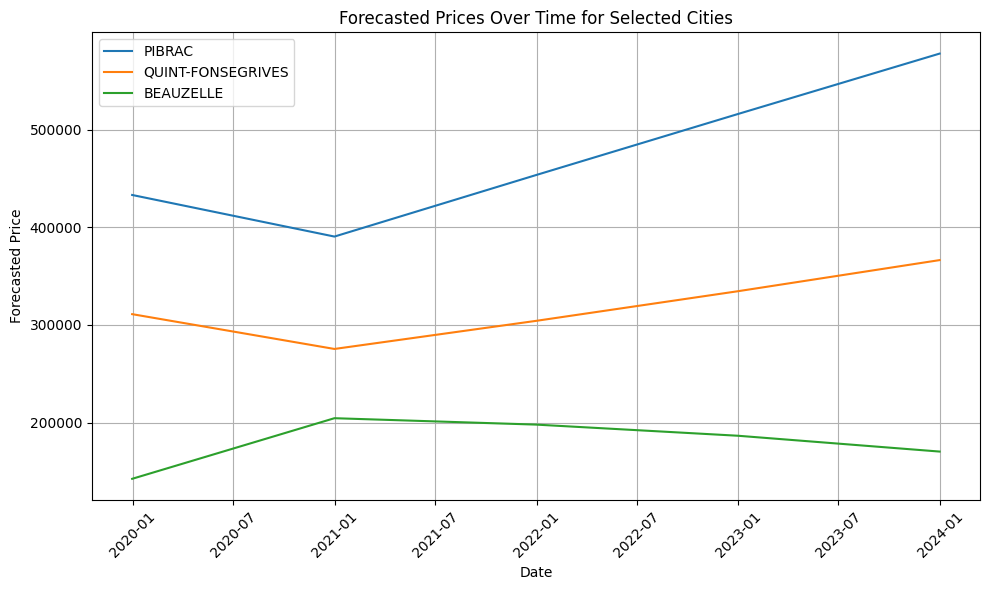

In [ ]:
# Filter forecast_df for apartments in Pibrac, Quint-Fonsegrives, and Beauzelle
cities_to_plot = ['PIBRAC', 'QUINT-FONSEGRIVES', 'BEAUZELLE']
cities_forecast = forecast_df[(forecast_df['ResidenceType'] == 'APARTMENT') & (forecast_df['City'].isin(cities_to_plot))]

# Plotting forecasted prices over time for the selected cities
plt.figure(figsize=(10, 6))
for city in cities_to_plot:
    city_data = cities_forecast[cities_forecast['City'] == city]
    plt.plot(city_data['Date'], city_data['ForecastedPrice'], label=city)

plt.title('Forecasted Prices Over Time for Selected Cities')
plt.xlabel('Date')
plt.ylabel('Forecasted Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


** Analyzing the forecasted prices over time for the selected cities: **

The plot shows the trend of forecasted apartment prices from 2020 to 2024 for Pibrac, Quint-Fonsegrives, and Beauzelle.
Overall, we observe a general upward trend in forecasted prices for all three cities, with fluctuations in certain periods.


Pibrac experienced the highest increase in prices, reaching a peak in 2021, followed by a slight decrease towards 2024.
Quint-Fonsegrives and Beauzelle also saw increases in prices, albeit with less volatility compared to Pibrac.


It's important to note that the forecasted prices are subject to change based on various factors such as market conditions and economic trends.



**Visualization for Houses Over the Next Year**


In [ ]:
# Filter forecast_df for houses
house_forecast_df = forecast_df[forecast_df['ResidenceType'] == 'HOUSE']

# Calculate the average price in 2019 for houses
avg_price_2019_house = house_forecast_df[house_forecast_df['Date'].dt.year == 2019]['ForecastedPrice'].mean()

# Calculate the forecasted price for 2020 for houses
forecast_price_2020_house = house_forecast_df[house_forecast_df['Date'].dt.year == 2020][['City', 'ForecastedPrice']]

# Calculate the percentage change between forecasted price for 2020 and average price in 2019 for houses
forecast_price_2020_house['PriceChangePercentage'] = (forecast_price_2020_house['ForecastedPrice'] / avg_price_2019_house - 1) * 100

# Sort the DataFrame by price change percentage in descending order for houses
sorted_forecasts_house = forecast_price_2020_house.sort_values(by='PriceChangePercentage', ascending=False)

# Display the top 3 cities with the highest percentage change for houses
print("Top 3 Cities with the Highest Percentage Change in Forecasted House Prices:")
print(sorted_forecasts_house.head(3))


Top 3 Cities with the Highest Percentage Change in Forecasted House Prices:
                         City  ForecastedPrice  PriceChangePercentage
131          VIEILLE TOULOUSE    584185.352390             100.515865
186         QUINT-FONSEGRIVES    395907.369900              35.891303
216  SAINT-ORENS-DE-GAMEVILLE    359619.280799              23.435774


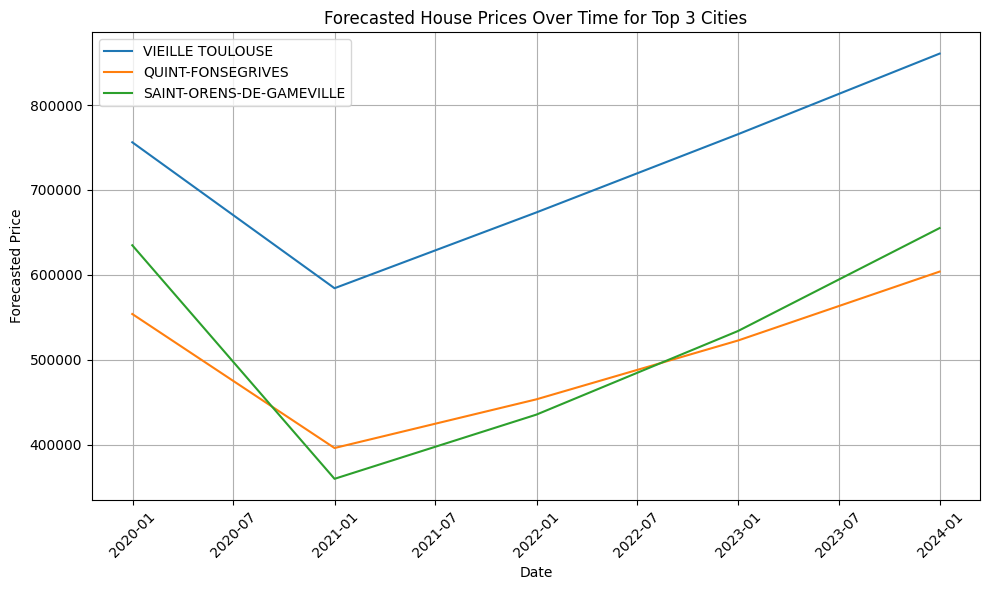

In [ ]:
# Get the top 3 cities with the highest percentage change for houses
top_3_cities_house = sorted_forecasts_house.head(3)['City'].tolist()

# Filter forecast_df for houses in the top 3 cities
house_cities_forecast = house_forecast_df[house_forecast_df['City'].isin(top_3_cities_house)]

# Plotting forecasted prices over time for the top 3 cities with the highest percentage change for houses
plt.figure(figsize=(10, 6))
for city in top_3_cities_house:
    city_data_house = house_cities_forecast[house_cities_forecast['City'] == city]
    plt.plot(city_data_house['Date'], city_data_house['ForecastedPrice'], label=city)

plt.title('Forecasted House Prices Over Time for Top 3 Cities')
plt.xlabel('Date')
plt.ylabel('Forecasted Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It seems that there is a downward trend in forecasted house prices from 2020 to 2021, followed by an upward trend from 2021 onwards for both Vieille Toulouse and Saint-Orens-de-Gameville. Specifically, Vieille Toulouse experiences a decrease in forecasted house prices from around 800 to 600 and then an increase to around 880. Similarly, Saint-Orens-de-Gameville follows a similar pattern.


Overall, the analysis suggests that although there may have been a temporary decline in forecasted house prices in 2021, there is a subsequent recovery and upward trajectory in prices in the following years. This indicates resilience in the housing market of these cities and potential opportunities for investment.

